### import some libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import time
import os
import glob
import matplotlib.pyplot as plt
import cv2

### Load weights and cfg

In [5]:
weights_path =os.path.join("/content/drive/MyDrive/project_data/yolov3.weights")
cfg_path =os.path.join("/content/drive/MyDrive/project_data/yolov3.cfg.txt")
print(" weights and cfg are loaded")

 weights and cfg are loaded


### load neural net in cv2 

In [6]:
net=cv2.dnn.readNetFromDarknet(cfg_path ,weights_path)


[link text](https://)### Get layesr name

In [7]:
names=net.getLayerNames()

In [8]:
names

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

### load the test image

In [65]:
image_path =os.path.join("/content/original.jfif")
img = plt.imread(image_path)


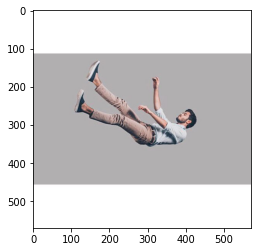

In [66]:
plt.imshow(img)

In [67]:
(H,W)=img.shape[:2]
layers_names=[names[i - 1] for i in net.getUnconnectedOutLayers()]

In [68]:
layers_names


['yolo_82', 'yolo_94', 'yolo_106']

### Run the inference on the test image

In [69]:
blob= cv2.dnn.blobFromImage(img,1/255.0,(416,416),crop=False,swapRB=False)
net.setInput(blob)
#calculate the runtime of algorithm
start=time.time()
layers_output=net.forward(layers_names)
print("A forward pass through tiny yolo v3 took{}".format(time.time()-start))

A forward pass through tiny yolo v3 took1.3241736888885498


In [70]:
layers_output[0].shape

(507, 85)

In [71]:
boxes=[]
confidences=[]
classIDs=[]

In [72]:
for output in layers_output:
    for detection in output:
        scores=detection[5:]
        classID=np.argmax(scores)
        confidence=scores[classID]
        if classID==0 :
          if (confidence >0.4):
            box=detection[:4] * np.array([W,H,W,H])
            bx,by,bw,bh=box.astype("int")
            
            x=int(bx-(bw/2))
            y=int(by-(bh/2))
           
            boxes.append([x,y,int(bw),int(bh)])
            confidences.append(float(confidence))
            classIDs.append(classID)

In [73]:
idx=cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.4)

In [74]:
labels_path=os.path.join("/content/drive/MyDrive/project_data/coco.names.txt")
labels = open(labels_path).read().strip().split("\n")

### plot boundung boxes in the image

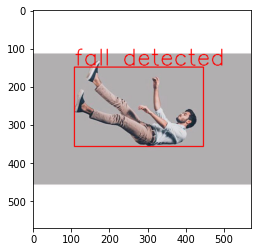

In [75]:
for i in idx.flatten():
    (x,y)=[boxes[i][0],boxes[i][1]]
    (w,h)=[boxes[i][2],boxes[i][3]]
    if bh>bw :
      cv2.rectangle (img,(x,y),(x+w ,y+h),(0,255,0),2)
    else :
      cv2.rectangle (img,(x,y),(x+w ,y+h),(255,0,0),2)
      cv2.putText(img,("fall detected"),(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,0),2)
plt.imshow(img)
